# Data Loader Agents <a id="make-a-data-cleaning-agent"></a>

Most of the time, we need to load data from different sources and formats. This is a very common task in data science projects. This notebook creates a data loader agent that can load data from different sources and formats. This agent specializes in loading:

# Table of Contents

1. [Load Libraries](#load-libraries)
2. [Setup AI](#setup)
3. [Create The Agent](#create-the-agent)
4. [Usage](#usage)
    1. [Example 1: What tools do you have access to? Return a table.](#example-1-what-tools-do-you-have-access-to-return-a-table)
    2. [Example 2: What folders and files are available?](#example-2-what-folders-and-files-are-available)
    3. [Example 3: What is in the data folder?](#example-3-what-is-in-the-data-folder)
    4. [Example 4: Let's load the bike sales data from the CSV file.](#example-4-lets-load-the-bike-sales-data-from-the-csv-file)
    5. [Example 5: What folders and files are available in my Documents directory?](#example-5-what-folders-and-files-are-available-in-my-documents-directory)
    6. [Example 6: Search for 'csv' files recursively in my current working directory.](#example-6-search-for-csv-files-recursively-in-my-current-working-directory)

### Load Libraries <a id="load-libraries"></a>

In [7]:
# * Libraries

from langchain_openai import ChatOpenAI
import pandas as pd
import os
from dotenv import load_dotenv

from src.agents import DataLoaderToolsAgent

### Setup AI <a id="setup"></a>

This section of code sets up the LLM inputs and the logging information. Logging is used to store AI-generated code and files during the agent's processing of files. 

This example uses OpenAI's API. But any LLM can be used. eg) Anthropic or local LLMs with Ollama.

In [8]:
# * Setup

# Load environment variables from .env file
load_dotenv('../.env')

llm = ChatOpenAI(model="gpt-4o-mini")
llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x123e79ff0>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x123ea0d90>, root_client=<openai.OpenAI object at 0x120979090>, root_async_client=<openai.AsyncOpenAI object at 0x123e7a080>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))

### Create The Agent <a id="create-the-agent"></a>

Run this code to create an agent with `make_data_loader_agent()`.

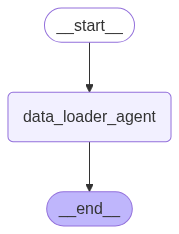

In [11]:
# Make a data loader agent
data_loader_agent = DataLoaderToolsAgent(
    llm, 
    invoke_react_agent_kwargs={},
)

data_loader_agent

## Usage

Here are several examples of how to use the agent:


#### Example 1: What tools do you have access to? Return a table.

In [12]:
# What tools do you have access to? Return a table.
data_loader_agent.invoke_agent("What tools do you have access to? Return a table.")

data_loader_agent.get_ai_message(markdown=True)

---DATA LOADER TOOLS AGENT----
    
    * RUN REACT TOOL-CALLING AGENT
    * POST-PROCESS RESULTS
    * Message types: ['HumanMessage', 'AIMessage']


Here's a table summarizing the tools I have access to:

| Tool Name                           | Description                                                                                      |
|-------------------------------------|--------------------------------------------------------------------------------------------------|
| `load_file`                         | Load a data file into a pandas DataFrame with intelligent chunking for large datasets.         |
| `load_directory`                    | Load multiple data files from a directory with optional pattern matching and recursion.         |
| `list_directory_contents`           | List all files and directories in the specified directory.                                     |
| `list_directory_recursive`          | Recursively list all files and directories within the specified directory.                      |
| `get_file_info`                    | Get information about a specific file.                                                          |
| `search_files_by_pattern`           | Search for files matching a pattern in a directory.                                            |
| `extract_pdf_text`                 | Extract text content from a PDF file.                                                           |
| `extract_pdf_tables`               | Extract tables from a PDF file and convert them to DataFrames.                                  |
| `smart_extract_data_from_pdf`      | Intelligently extract structured data from PDF using multiple methods.                         |
| `get_pdf_info`                     | Get comprehensive information about a PDF file, including metadata and structure information.    |

If you need further details about any specific tool, feel free to ask!

#### Example 2: What folders and files are available? 

**note about searching directories:** The agent will by default look for files and folders in your current working directory. However you can change this behavior by prompting the agent to look in a different folder (e.g. absolute path or relative path or overall name : Documents, Downloads, etc.).

In [38]:
# What folders and files are available?
data_loader_agent.invoke_agent("What folders and files are available at the ../../ai-data-science directory of my machine? Return the file folder structure as code formatted block with the root path at the top and just the top-level folders and files.")
data_loader_agent.get_ai_message(markdown=True)

---DATA LOADER TOOLS AGENT----
    
    * RUN REACT TOOL-CALLING AGENT
    * POST-PROCESS RESULTS
    * Message types: ['HumanMessage', 'AIMessage', 'ToolMessage', 'AIMessage']


Here is the top-level folder and file structure for the `../../ai-data-science` directory:

```
../../ai-data-science/
│
├── requirements.txt
├── housing_data_cleaner.py
├── STATUS.md
├── direct_churn_data_cleaning_report.md
├── checkpoint_1_demo.md
├── create_test_agent.py
├── README.md
├── agent1qvx9y77uay_data.json
├── setup.py
├── .gitignore
├── .env
├── minimal_working_uagent.py
├── churn_data_cleaning_report.md
├── implementation_plan.md
├── guide-uagent-langchain-adapter.md
│
├── demo/
├── explanation/
├── test_output/
├── ai_data_science.egg-info/
├── debug_logs/
├── implementation-plans/
├── tests/
├── output/
├── __pycache__/
├── docs/
├── logs/
├── examples/
├── .git/
├── data/
├── apps/
└── src/
```

#### Example 3: What is in the data folder?

In [29]:
# What is in the data folder?
data_loader_agent.invoke_agent("What is in the ../data folder?")

data_loader_agent.get_ai_message(markdown=True)

---DATA LOADER TOOLS AGENT----
    
    * RUN REACT TOOL-CALLING AGENT
    * POST-PROCESS RESULTS
    * Message types: ['HumanMessage', 'AIMessage', 'ToolMessage', 'AIMessage']


The `../data` folder contains the following items:

- **Files:**
  - `sample_data.csv`
  - `churn_data.csv`

- **Directory:**
  - `samples`

In total, there are 3 items in this directory.

#### Example 4: Let's load the bike sales data from the CSV file.

In [34]:
# Load the bike_sales_data.csv file from the data folder.
data_loader_agent.invoke_agent("Load the bike_sales_data.csv file from the ..data folder.")

data_loader_agent.get_ai_message(markdown=True)

---DATA LOADER TOOLS AGENT----
    
    * RUN REACT TOOL-CALLING AGENT
   📦 Large dataset detected: 13149 rows × 5 columns
   🔄 Using intelligent chunking: 200 rows per chunk
   📊 Estimated tokens per chunk: ~4400
    * POST-PROCESS RESULTS
    * Message types: ['HumanMessage', 'AIMessage', 'ToolMessage', 'AIMessage']
    * Checking tool message: load_file
    * Found data in tool message: load_file (JSON string)


The bike sales data has been successfully loaded from the `bike_sales_data.csv` file. Here are some details about the dataset:

### File Information:
- **Path:** `../data/bike_sales_data.csv`
- **Rows:** 13,149
- **Columns:** 5
- **File Format:** CSV
- **Size:** 0.49 MB
- **Memory Usage:** 2.03 MB

### Columns:
1. **date:** Date of the sale (object)
2. **bike_model:** Model of the bike sold (object)
3. **price:** Price of the bike (int64)
4. **quantity_sold:** Quantity of bikes sold (int64)
5. **extended_sales:** Total sales revenue (int64)

### Numeric Summary:
- **Price:**
  - Mean: 3,332.78
  - Std: 3,242.78
  - Min: 350.00
  - Max: 9,900.00
- **Quantity Sold:**
  - Mean: 15.96
  - Std: 15.86
  - Min: 2
  - Max: 108
- **Extended Sales:**
  - Mean: 25,713.97
  - Std: 18,566.99
  - Min: 2,800
  - Max: 118,800

If you need further analysis or specific information from this dataset, let me know!

To extract the data from the artifact, we can use the following code:

In [35]:
data_loader_agent.get_artifacts(as_dataframe=True)

,date,bike_model,price,quantity_sold,extended_sales
0,2021-01-01,Commuter Swift,495,23,11385
1,2021-01-01,Urban Rider,350,19,6650
2,2021-01-01,City Cruiser,400,19,7600
3,2021-01-01,Mountain Trail Pro,1250,11,13750
4,2021-01-01,Gravel Explorer,2200,9,19800
...,...,...,...,...,...
195,2021-01-22,Carbon Storm,5000,5,25000
196,2021-01-22,Titanium Falcon,7500,3,22500
197,2021-01-22,Speedster Elite,9900,4,39600
198,2021-01-23,Commuter Swift,495,15,7425


#### Example 5: What folders and files are available in my Documents directory?

Now we'll switch things up and look at a directory that is outside of my current working directory. 

In [39]:
# What folders and files are available in my Documents directory?
data_loader_agent.invoke_agent("What folders and files are available in my /Users/abhivir42/Documents/Imperial directory? Do not return recursive results.")

data_loader_agent.get_ai_message(markdown=True)

---DATA LOADER TOOLS AGENT----
    
    * RUN REACT TOOL-CALLING AGENT
    * POST-PROCESS RESULTS
    * Message types: ['HumanMessage', 'AIMessage', 'ToolMessage', 'AIMessage']


In your `/Users/abhivir42/Documents/Imperial` directory, the following files are available:

1. CollegeID.jpeg
2. .DS_Store
3. Abhivir Singh - Abhivir Singh - Master of Engineering - Transcript - 02232239.pdf
4. RCA - 02232239.pdf
5. Abhivir Singh - Letter(s) for _ Computing (Artificial Intelligence and Machine Learning) - Letter - 02232239.pdf
6. Address_Proof_voting.pdf
7. Year1_transcript.pdf
8. Statement_Of_Registration_Imperial.pdf
9. UROP.pdf
10. statement_of_registration.pdf
11. Statement_of_Registration_Imperial_kemp_porter_address.pdf
12. CollegeID.pdf
13. ProofOfAddress.pdf
14. 5 Kilkie Street - 2022 Dendrow AST NEW - (TE203I30_240705_121052.pdf
15. Abhivir_Proof_of_Registration_Imperial.pdf

There are no subdirectories in this location.

#### Example 6: Search for 'csv' files recursively in my current working directory.

In [43]:
# Search for 'csv' files recursively in my current working directory. 
data_loader_agent.invoke_agent("Search for 'csv' files recursively in my directory one level above my current working directory.")

data_loader_agent.get_ai_message(markdown=True)

---DATA LOADER TOOLS AGENT----
    
    * RUN REACT TOOL-CALLING AGENT
    * POST-PROCESS RESULTS
    * Message types: ['HumanMessage', 'AIMessage', 'ToolMessage', 'AIMessage']


I found the following 'csv' files in your directory:

1. **File Path:** `../data/bike_sales_data.csv`
2. **File Path:** `../data/sample_data.csv`
3. **File Path:** `../data/churn_data.csv`
4. **File Path:** `../data/dirty_dataset.csv`
5. **File Path:** `../examples/sample_data.csv`

If you need any further actions or information about these files, let me know!

We can then load the data from one of the CSV files. 

In [45]:
data_loader_agent.invoke_agent("Load the churn data at path ../data/churn_data.csv")

data_loader_agent.get_artifacts(as_dataframe=True)

---DATA LOADER TOOLS AGENT----
    
    * RUN REACT TOOL-CALLING AGENT
    * POST-PROCESS RESULTS
    * Message types: ['HumanMessage', 'AIMessage', 'ToolMessage', 'AIMessage']
    * Checking tool message: load_file
    * Found data in tool message: load_file (JSON string)


,customer_id,gender,age,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,37,1,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,59,34,Yes,No,DSL,Yes,No,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,41,2,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,56,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,33,2,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,43,8,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,580.90,No
6,1452-KIOVK,Male,58,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,37,12,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.70,839.65,Yes
8,7892-POOKP,Female,48,27,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.40,2550.00,Yes
9,6388-TABGU,Male,62,4,No,No phone service,DSL,No,Yes,No,No,No,One year,No,Mailed check,34.80,142.10,No


Or we can load all of the datasets from the CSV files:

In [48]:
data_loader_agent.invoke_agent("Load all csv files in ../data/.")

data_loader_agent.get_ai_message(markdown=True)

---DATA LOADER TOOLS AGENT----
    
    * RUN REACT TOOL-CALLING AGENT


/Users/abhivir42/projects/fetch/ai-data-science/src/tools/data_loader.py:421: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = load_file(file_path)


   📦 Large dataset detected: 13149 rows × 5 columns
   🔄 Using intelligent chunking: 200 rows per chunk
   📊 Estimated tokens per chunk: ~4400
    * POST-PROCESS RESULTS
    * Message types: ['HumanMessage', 'AIMessage', 'ToolMessage', 'AIMessage']
    * Checking tool message: load_directory
    * Tool message content type: <class 'str'>
    * WARNING: Data loading tool was called but no artifact found in messages
    * Attempting direct tool execution as fallback...
    * Creating empty data structure as fallback


I have successfully loaded all the CSV files from the specified directory `../data/`. Here are the details of each file:

1. **bike_sales_data.csv**
   - **Rows:** 13,149
   - **Columns:** 5
   - **Data Types:** 
     - date: object
     - bike_model: object
     - price: int64
     - quantity_sold: int64
     - extended_sales: int64
   - **Memory Usage:** 2.03 MB

2. **sample_data.csv**
   - **Rows:** 30
   - **Columns:** 9
   - **Data Types:**
     - id: int64
     - name: object
     - age: float64
     - income: float64
     - education: object
     - city: object
     - is_customer: bool
     - join_date: object
     - satisfaction_score: float64
   - **Memory Usage:** 0.01 MB

3. **churn_data.csv**
   - **Rows:** 40
   - **Columns:** 18
   - **Data Types:**
     - customer_id: object
     - gender: object
     - age: int64
     - tenure: int64
     - phone_service: object
     - multiple_lines: object
     - internet_service: object
     - online_security: object
     - online_backup: object
     - tech_support: object
     - streaming_tv: object
     - streaming_movies: object
     - contract: object
     - paperless_billing: object
     - payment_method: object
     - monthly_charges: float64
     - total_charges: float64
     - churn: object
   - **Memory Usage:** 0.03 MB

4. **dirty_dataset.csv**
   - **Rows:** 5
   - **Columns:** 8
   - **Data Types:**
     - ID: float64
     - Name: object
     - Age: object
     - Email: object
     - Join Date: object
     - Salary: object
     - Department: object
     - Comments: object
   - **Memory Usage:** 0.0 MB

If you need further analysis on any of these datasets or if you have any specific tasks in mind, let me know!

Let's extract one of the datasets that were loaded: